## A script for generating convergence plots

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
def plot_convergence(file_name):
    
    stats = np.load(file_name + "/statistics.npy", allow_pickle=True).item()
    mean_values = np.array(stats["mdn"])
    std_values = np.array(stats["std"])
    best_values = np.array(stats["best"])
    ab_best_values = np.array(stats["absolute_best"])

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(mean_values, label="iteration mean", color="lightseagreen")
    ax.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, alpha=0.2, color="mediumturquoise")
    ax.plot(best_values, label="iteration best", color="lightcoral", linewidth=3)
    ax.plot(ab_best_values, label="absolute best", color="darkorange", linewidth=3, linestyle='--')

    #ax.set_xlim(0, len(mean_values))
    ax.tick_params(direction='in')
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.tick_params(axis='both', which='major', labelsize=12)

    plt.legend(fontsize=14)
    plt.xlabel("Iterations", fontdict={"size": 14})
    plt.ylabel("Latency [cycles]", fontdict={"size": 14})
    plt.show()


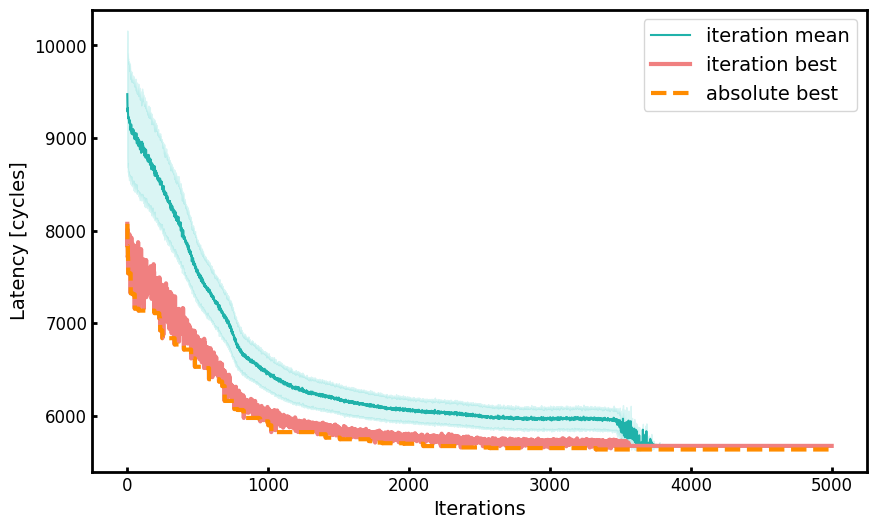

In [9]:
# 5k iterations ACO LeNet4
where = '../data/'
file_name = 'ACO_LeNet4_test_lem_5k_run_2025-07-13_10-22-34'
plot_convergence(where + file_name)

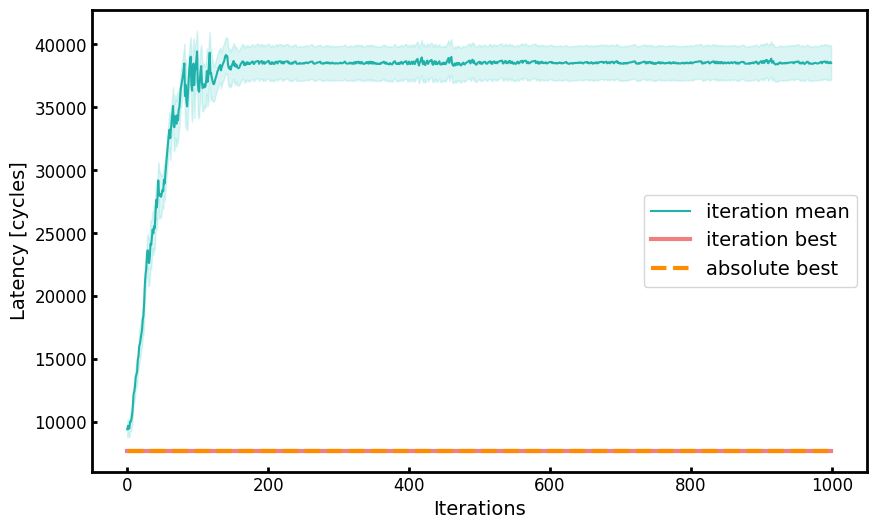

In [6]:
# 1k iterations GA LeNet4
where = '../data/'
file_name = 'GA_LeNet4_GA_mat_32_rank_sol_per_pop_512_2025-07-16_17-03-18'
plot_convergence(where + file_name)

In [33]:
def plot_convergence_zoom(file_name):
    """
    Plot convergence statistics with interactive zooming and panning.
    
    Parameters:
    file_name (str): Path to the directory containing statistics.npy
    """
    
    # Load data
    stats = np.load(file_name + "/statistics.npy", allow_pickle=True).item()
    mean_values = np.array(stats["mdn"])
    std_values = np.array(stats["std"])
    best_values = np.array(stats["best"])
    ab_best_values = np.array(stats["absolute_best"])
    
    iterations = np.arange(len(mean_values))
    
    # Create figure
    fig = go.Figure()
    
    # Add standard deviation band (fill area)
    fig.add_trace(go.Scatter(
        x=np.concatenate([iterations, iterations[::-1]]),
        y=np.concatenate([mean_values + std_values, (mean_values - std_values)[::-1]]),
        fill='toself',
        fillcolor='rgba(72, 209, 204, 0.2)',  # lightseagreen with transparency
        line=dict(color='rgba(255,255,255,0)'),
        name='±1 std',
        showlegend=True,
        hoverinfo='skip'
    ))
    
    # Add mean line
    fig.add_trace(go.Scatter(
        x=iterations,
        y=mean_values,
        mode='lines',
        name='Iteration mean',
        line=dict(color='lightseagreen', width=2),
        hovertemplate='<b>Iteration mean</b><br>' +
                      'Iteration: %{x}<br>' +
                      'Value: %{y:.2f}<br>' +
                      '<extra></extra>'
    ))
    
    # Add iteration best line
    fig.add_trace(go.Scatter(
        x=iterations,
        y=best_values,
        mode='lines',
        name='Iteration best',
        line=dict(color='lightcoral', width=3),
        hovertemplate='<b>Iteration best</b><br>' +
                      'Iteration: %{x}<br>' +
                      'Value: %{y:.2f}<br>' +
                      '<extra></extra>'
    ))
    
    # Add absolute best line
    fig.add_trace(go.Scatter(
        x=iterations,
        y=ab_best_values,
        mode='lines',
        name='Absolute best',
        line=dict(color='darkorange', width=3, dash='dash'),
        hovertemplate='<b>Absolute best</b><br>' +
                      'Iteration: %{x}<br>' +
                      'Value: %{y:.2f}<br>' +
                      '<extra></extra>'
    ))
    
    # Update layout
    fig.update_layout(
        title=dict(
            text='Convergence Analysis',
            font=dict(size=16),
            x=0.5
        ),
        xaxis=dict(
            title='Iterations',
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(128, 128, 128, 0.2)',
            zeroline=False,
            range=[0, len(mean_values)]
        ),
        yaxis=dict(
            title='Latency [cycles]',
            title_font=dict(size=14),
            tickfont=dict(size=12),
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(128, 128, 128, 0.2)',
            zeroline=False
        ),
        legend=dict(
            font=dict(size=14),
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01,
            bgcolor="rgba(255, 255, 255, 0.8)",
            bordercolor="rgba(0, 0, 0, 0.2)",
            borderwidth=1
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        width=900,
        height=500,
        margin=dict(l=60, r=60, t=60, b=60)
    )
    
    # Add interactive features
    fig.update_layout(
        # Enable zooming and panning
        dragmode='zoom',
        selectdirection='d',
        
        # Add toolbar with useful options
        showlegend=True,
        
        # Configure hover behavior
        hovermode='x unified'
    )
    
    # Show the plot
    fig.show()

# Example usage:
# plot_convergence('your_data_directory')


In [35]:
where = '../data/'
file_name = 'ACO_LeNet4_test_lem_5k_run_2025-07-13_10-22-34'
plot_convergence_zoom(where + file_name)

In [38]:
where = '../data/'
file_name = 'GA_LeNet4_2025-07-15_12-05-12'
plot_convergence_zoom(where + file_name)

In [3]:

def plot_ACO_GA_best(prefix, folders):
    # Plot a bunch of convergence plots in the same figure
    prefix = prefix
    folders = folders
    # labels = [r"ACO$_{random}$", r"ACO$_{improved}$", r"GA"]
    labels = [r"ACO", r"GA"]
    stats = []

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    colors = ["lightcoral", "lightseagreen", "mediumpurple"]
    for i,folder in enumerate(folders):
        folder = prefix + folder
        stats.append(np.load(folder+"/statistics.npy", allow_pickle=True).item())
        mean_values = np.array(stats[-1]["mdn"])
        std_values = np.array(stats[-1]["std"])
        best_values = np.array(stats[-1]["best"])
        best_values = np.array(stats[-1]["absolute_best"])
        # best_values = np.array([stats["absolute_best"][i][2] for i in range(1,len(stats["best"]))])

        if "GA" in folder:
            best_values = np.array(stats[-1]["best"])

        name = folder.split("/")[-1]
        

        # add best line
        ax.plot(best_values, label=labels[i], color = colors[i], linewidth=3)
    ax.set_xlim(0, len(mean_values))
    ax.tick_params(direction='in')
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.tick_params(axis='both', which='major', labelsize=14)


    plt.legend(fontsize=14)
    plt.xlabel("Iterations", fontdict={"size": 16})
    plt.ylabel("Latency [cycles]", fontdict={"size": 16})
    # plt.title("convergence", fontdict={"size": 16})


In [4]:
def plot_ACO_GA_best_subplots(prefix, grouped_folders):
    """
    Plot a bunch of convergence plots in separate subplots or grouped together in two columns.
    Args:
        prefix (str): The base directory path.
        grouped_folders (list of lists): List of folder groups to load data from.
                                         Each inner list represents folders to be plotted on the same subplot.
    """
    stats = []
    colors = ["lightcoral", "lightseagreen", "mediumpurple", "lightblue", "lightpink"]

    # Create subplots grid with two columns
    num_subplots = len(grouped_folders)
    num_rows = (num_subplots + 1) // 2  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows), sharex=True)

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, folder_group in enumerate(grouped_folders):
        ax = axes[i]
        for j, folder in enumerate(folder_group):
            folder_path = prefix + folder
            stats.append(np.load(folder_path + "/statistics.npy", allow_pickle=True).item())
            mean_values = np.array(stats[-1]["mdn"])
            std_values = np.array(stats[-1]["std"])
            best_values = np.array(stats[-1]["absolute_best"])

            if "GA" in folder:
                best_values = np.array(stats[-1]["best"])
                label = "GA"
            else:
                label = "ACO"

            # Plot each folder in the group on the same subplot
            ax.plot(best_values, label=label, color=colors[j % len(colors)], linewidth=3)

        ax.set_xlim(0, len(mean_values))
        ax.tick_params(direction='in')
        ax.spines['top'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.xaxis.set_tick_params(width=2)
        ax.yaxis.set_tick_params(width=2)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_title(f"Convergence Plot for Group {i + 1}", fontsize=16)

        ax.legend(fontsize=14)
        ax.set_ylabel("Latency [cycles]", fontdict={"size": 16})

    # Hide any unused subplots
    for i in range(num_subplots, len(axes)):
        fig.delaxes(axes[i])

    # Set common x-label for all subplots
    fig.text(0.5, 0.04, "Iterations", ha="center", fontsize=16)

    plt.tight_layout()
    plt.show()

In [5]:
def plot_paths_several(prefix, folders, labels, colors=None):
    """
    Plot a bunch of convergence plots in the same figure.
    Args:
        prefix (str): The base directory path.
        folders (list): List of folder names to load data from.
        labels (list): List of labels for the plots.
        colors (list, optional): List of colors for the plots. Defaults to a predefined list.
    """
    if colors is None:
        colors = ["lightcoral", "lightseagreen", "mediumpurple", "lightblue", "lightpink"]

    stats = []

    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    for i, folder in enumerate(folders):
        folder_path = prefix + folder
        stats.append(np.load(folder_path + "/statistics.npy", allow_pickle=True).item())
        mean_values = np.array(stats[-1]["mdn"])
        std_values = np.array(stats[-1]["std"])
        best_values = np.array(stats[-1]["absolute_best"])

        if "GA" in folder:
            best_values = np.array(stats[-1]["best"])

        # Add best line
        ax.plot(best_values, label=labels[i], color=colors[i], linewidth=3)

    ax.set_xlim(0, len(mean_values))
    ax.tick_params(direction='in')
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.tick_params(axis='both', which='major', labelsize=14)

    plt.legend(fontsize=14)
    plt.xlabel("Iterations", fontdict={"size": 16})
    plt.ylabel("Latency [cycles]", fontdict={"size": 16})
    plt.show()


In [39]:
import numpy as np
import pandas as pd
#load and print .npy file: 
folder = "../data/GA_LeNet4_2025-07-15_12-05-12"
stats = np.load(folder+"/statistics.npy", allow_pickle=True).item()
print(stats)

# Convert the dictionary to a DataFrame
stats_df = pd.DataFrame.from_dict(stats, orient='index').T
# Display the DataFrame as a table
stats_df


{'mdn': [8922.1953125, 8827.1953125, 8886.439453125, 8890.40625, 8779.25390625, 8500.2265625, 9078.490234375, 9071.787109375, 9008.56640625, 9179.69140625, 9014.115234375, 9318.3125, 9252.36328125, 8984.82421875, 8669.3515625, 8805.84765625, 8895.61328125, 8704.283203125, 8862.650390625, 8062.58203125, 8780.427734375, 8394.359375, 8599.205078125, 7788.6015625, 8582.39453125, 8582.318359375, 8187.830078125, 8108.751953125, 7899.626953125, 7402.12890625, 8176.001953125, 7983.193359375, 8092.90234375, 8356.2109375, 7815.865234375, 8532.978515625, 8780.953125, 8625.125, 8494.2109375, 8376.388671875, 8050.4765625, 8353.5, 8292.130859375, 7367.697265625, 8103.20703125, 7174.98046875, 7353.9375, 7077.099609375, 7032.31640625, 6959.376953125, 7688.25390625, 7734.384765625, 7951.23828125, 7344.49609375, 7792.87890625, 7774.27734375, 7731.740234375, 7368.837890625, 7870.333984375, 7854.654296875, 7871.6953125, 7688.470703125, 7500.505859375, 8134.791015625, 7468.98046875, 7166.783203125, 6952.89

,mdn,std,best,absolute_best
0,8922.195312,525.558599,7463.0,inf
1,8827.195312,510.252719,7428.0,7463.0
2,8886.439453,581.931972,7428.0,7428.0
3,8890.406250,555.660558,7334.0,7334.0
4,8779.253906,496.125234,7334.0,7238.0
...,...,...,...,...
995,8125.697266,407.846378,5976.0,NaN
996,7898.275391,375.624532,5976.0,NaN
997,7483.517578,326.640774,5976.0,NaN
998,7335.507812,378.178488,5976.0,NaN


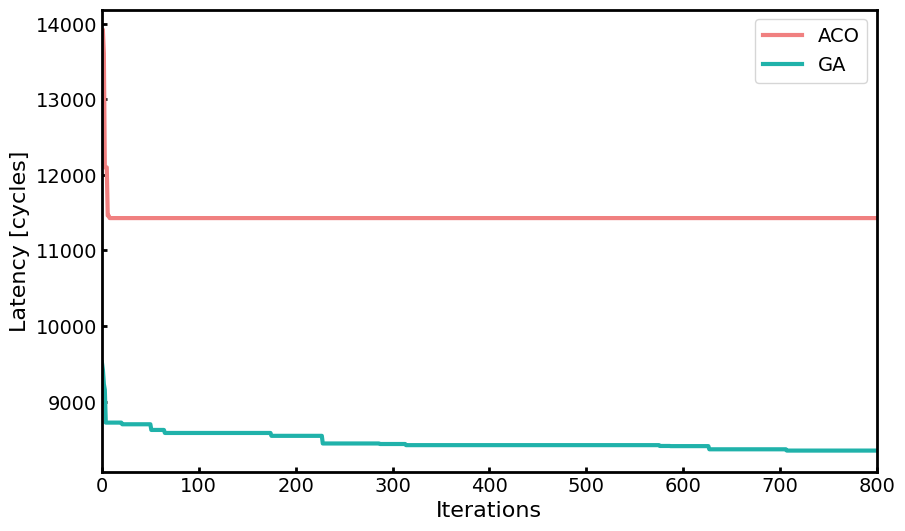

In [ ]:
prefix = '/Users/jakubjastrzebski/Desktop/data_mixed_part_seed_2137_9April25/'
folders = ['ACO_seed_2137_x1_2025-04-08_13-47-48', 'GA_seed_2137_x1_2025-04-02_00-00-20']
plot_ACO_GA_best(prefix, folders)

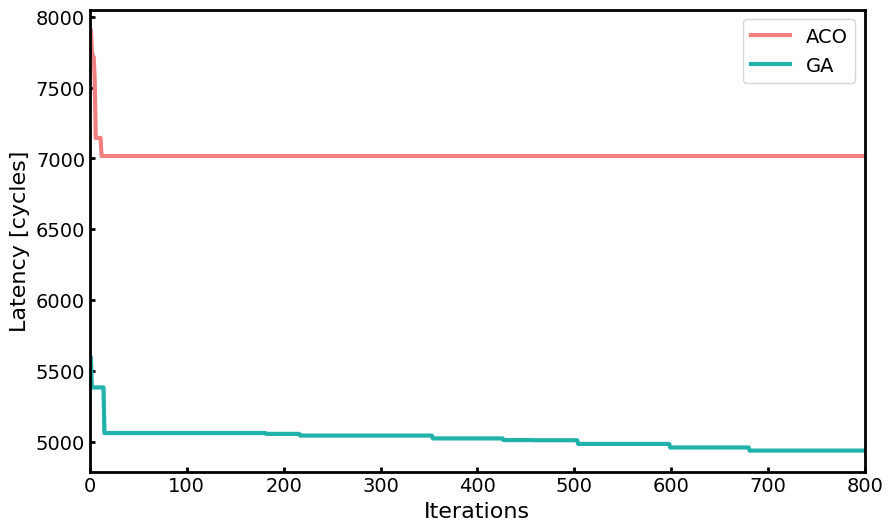

In [ ]:
prefix = '/Users/jakubjastrzebski/Desktop/data_mixed_part_seed_2137_9April25/'
folders = ['ACO_seed_2137_x2_2025-04-08_13-47-07', 'GA_seed_2137_x2_2025-04-01_23-59-50']
plot_ACO_GA_best(prefix, folders)

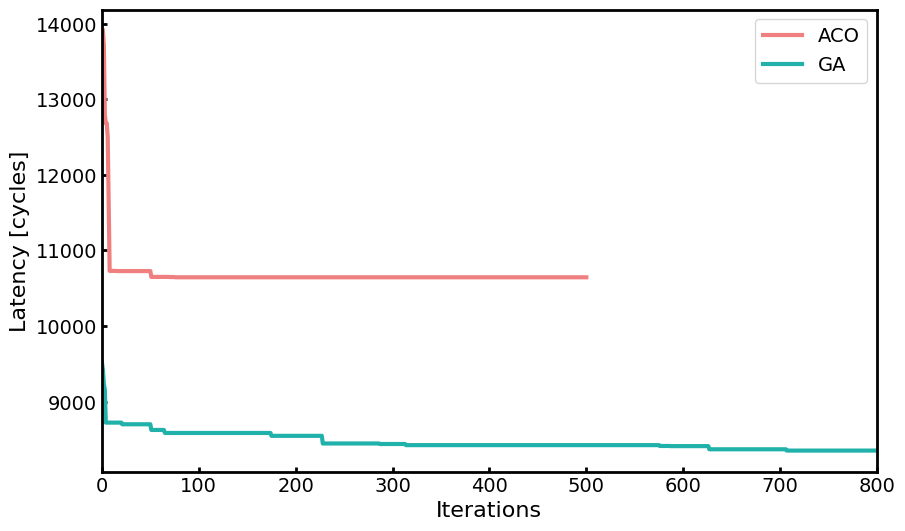

In [51]:
prefix = '/Users/jakubjastrzebski/Desktop/data_mixed_part_seed_2137_2April25/'
folders = ['ACO_seed_2137_x1', 'GA_seed_2137_x1']
plot_ACO_GA_best(prefix, folders)

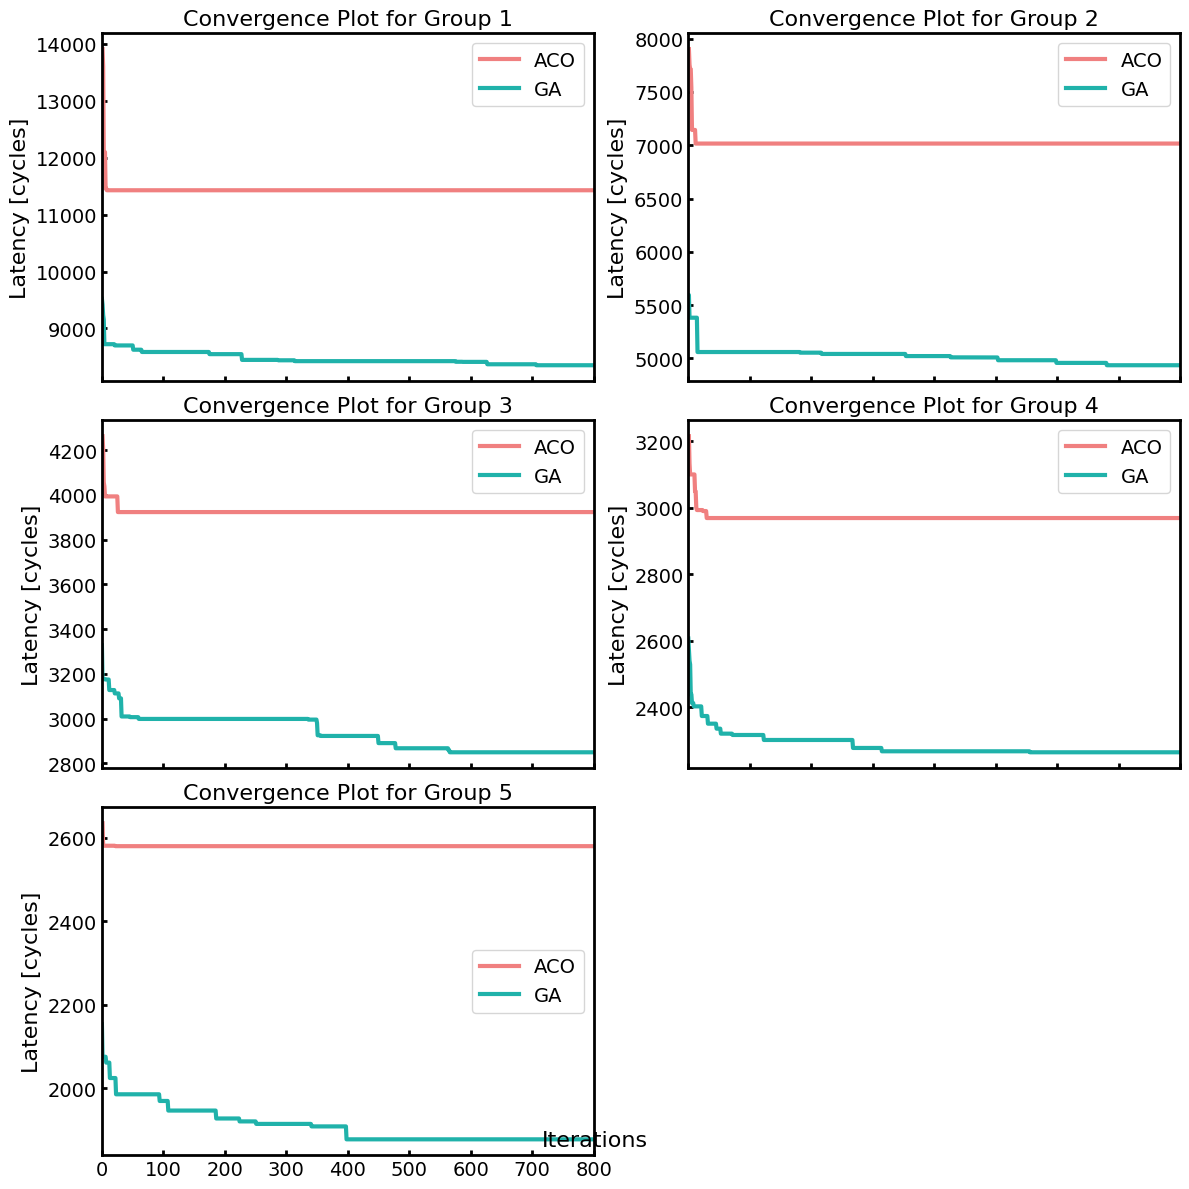

In [30]:
prefix = '/Users/jakubjastrzebski/Desktop/data_mixed_part_seed_2137_9April25/'
folders = [['ACO_seed_2137_x1_2025-04-08_13-47-48', 'GA_seed_2137_x1_2025-04-02_00-00-20'], 
           ['ACO_seed_2137_x2_2025-04-08_13-47-07', 'GA_seed_2137_x2_2025-04-01_23-59-50'],
           ['ACO_seed_2137_x5_2025-04-08_13-46-32', 'GA_seed_2137_x5_2025-04-01_23-58-38'],
           ['ACO_seed_2137_x10_2025-04-08_13-46-06', 'GA_seed_2137_x10_2025-04-01_23-57-44'],
           ['ACO_seed_2137_x25_2025-04-08_13-45-38', 'GA_seed_2137_x25_2025-04-01_23-54-31']
           ]
plot_ACO_GA_best_subplots(prefix, folders)

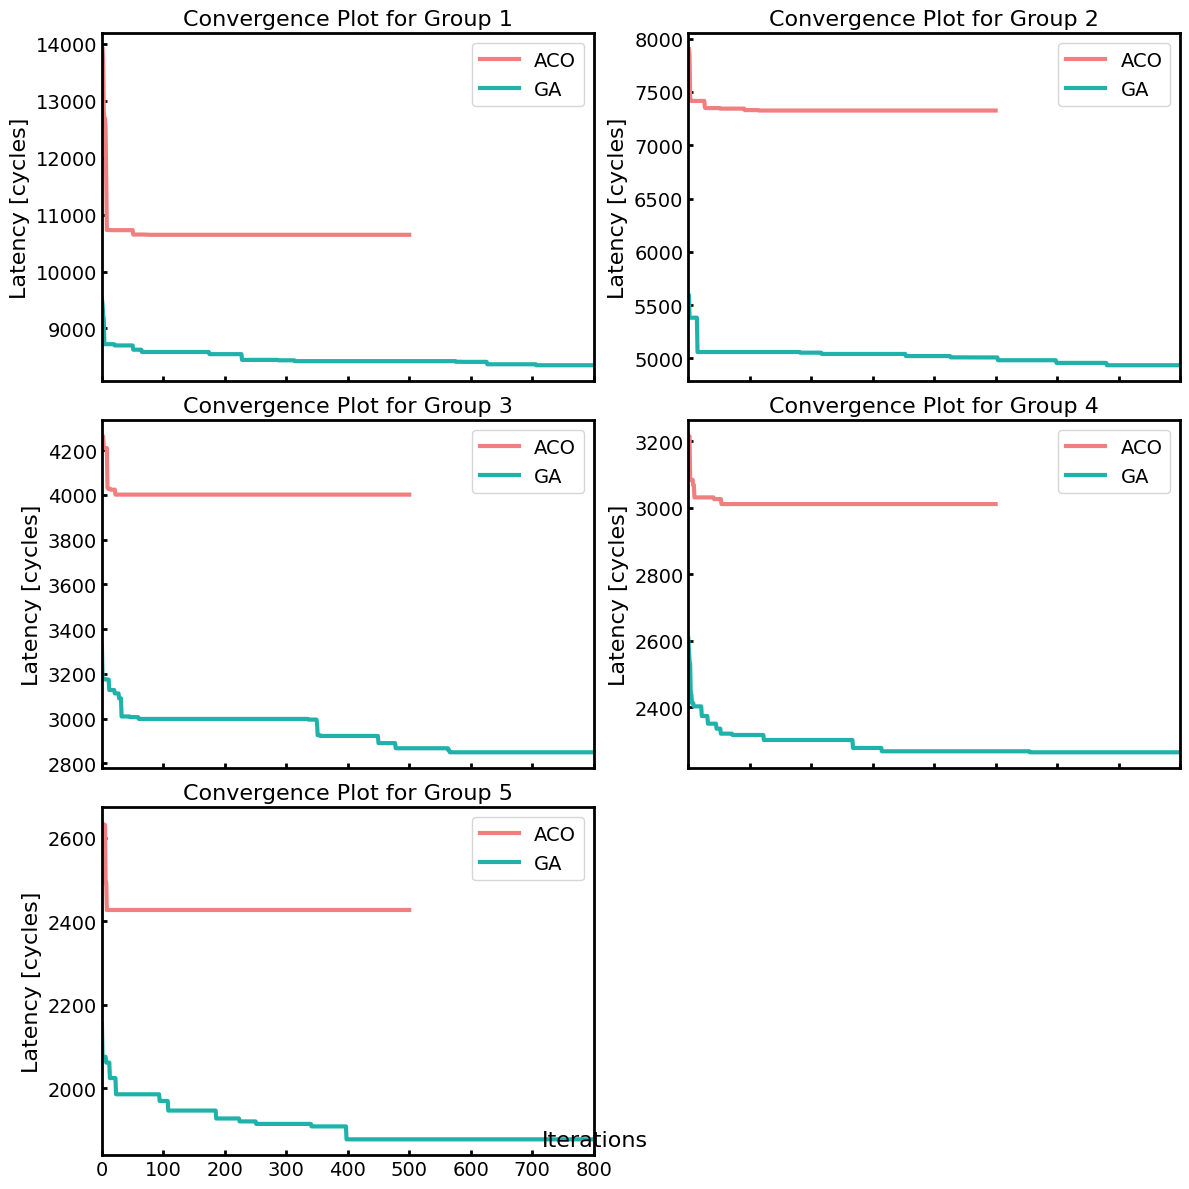

In [ ]:
# here half of the seed is set in ACO 
prefix = '/Users/jakubjastrzebski/Desktop/data_mixed_part_seed_2137_2April25/'
folders = [['ACO_seed_2137_x1', 'GA_seed_2137_x1'], 
           ['ACO_seed_2137_x2', 'GA_seed_2137_x2'],
           ['ACO_seed_2137_x5', 'GA_seed_2137_x5'],
           ['ACO_seed_2137_x10', 'GA_seed_2137_x10'],
           ['ACO_seed_2137_x25', 'GA_seed_2137_x25']
           ]
plot_ACO_GA_best_subplots(prefix, folders)

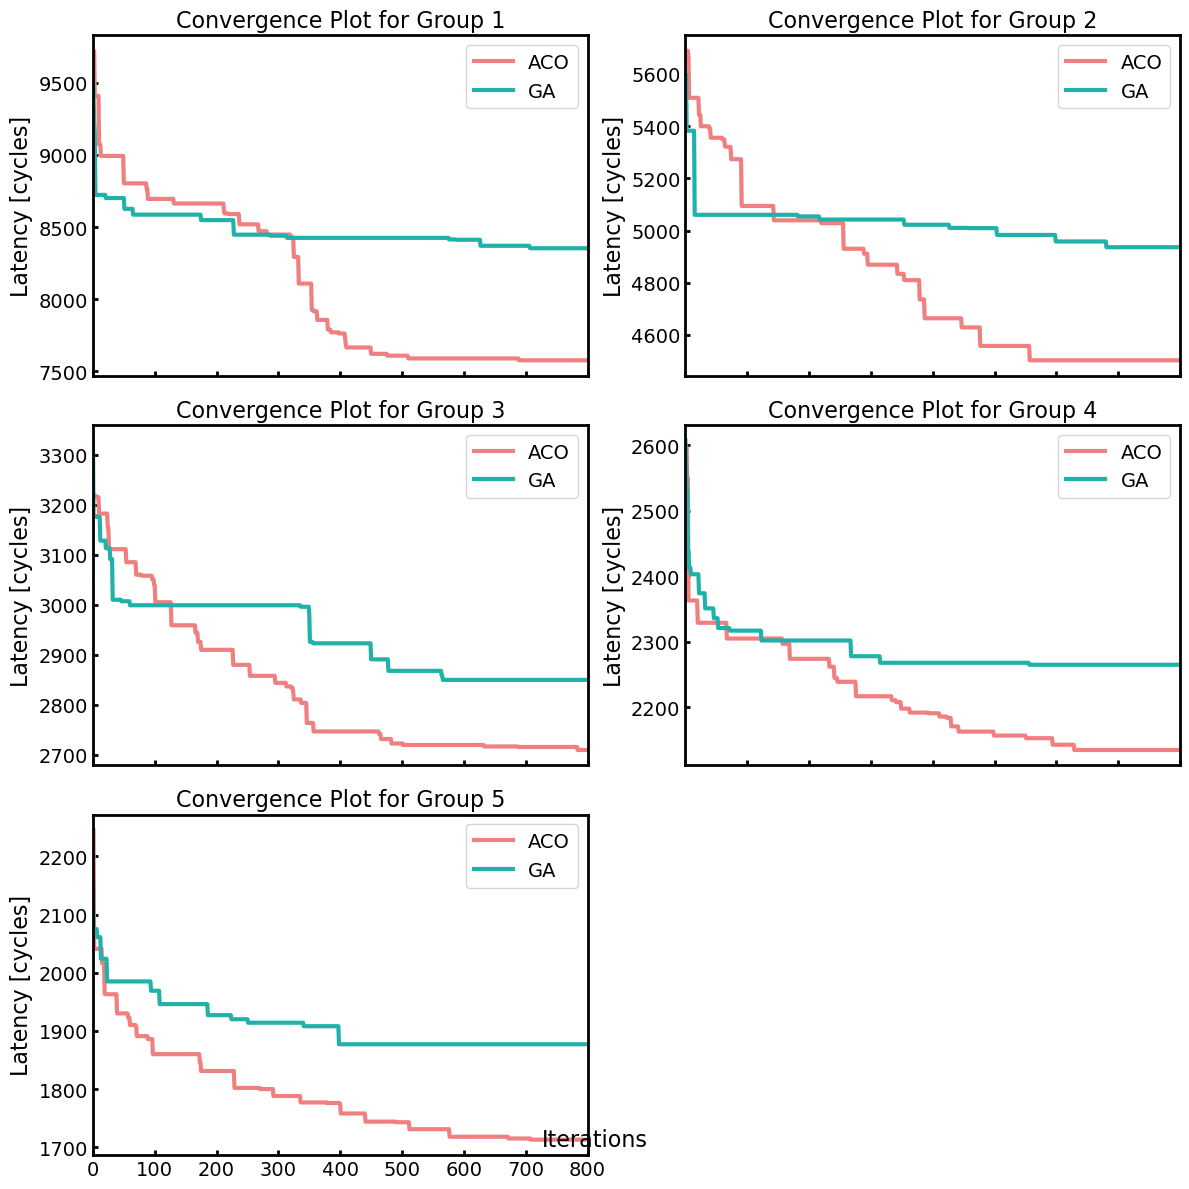

In [7]:
# here half of the seed is set in ACO 
prefix = '/Users/jakubjastrzebski/Desktop/data_mixed_no_seed_10April25/'
folders = [['ACO_x1', 'GA_seed_2137_x1'], 
           ['ACO_x2', 'GA_seed_2137_x2'],
           ['ACO_x5', 'GA_seed_2137_x5'],
           ['ACO_x10', 'GA_seed_2137_x10'],
           ['ACO_x25', 'GA_seed_2137_x25']
           ]
plot_ACO_GA_best_subplots(prefix, folders)

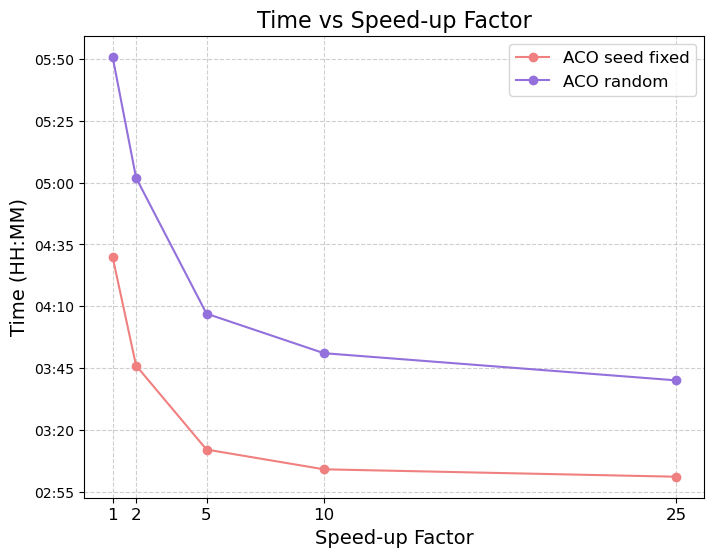

In [ ]:
from datetime import datetime

#time plot for seed 2137 for ACO 9 April 2025 and GA 2 April 2025 for 800 iterations seed = 2137
data_ACO = ['04:30:23.68','03:46:29.69','03:12:15.79','03:04:28.90','03:01:12.09']
#data_GA = ['06:11:42.00', '04:43:28.96', '04:16:55.48', '04:09:38.72', '03:37:50.24']
#time plot for seed 2137 for ACO 10 April 2025 for 800 iterations NO seed
data_ACO_no_seed = ['05:51:20.94','05:02:10.02','04:07:59.74','03:51:57.63','03:40:19.37']

#pierwsze: speedup:2 drugie:4 - tyle samo!
data_ACO_no_seed_Booksim_speedup = ['02:31:25.03','02:31:34.03']

speed_up_factor = [1, 2, 5, 10, 25]

option = 'normal' #'normal'
#scatter plot with line: 
# Convert time strings to total minutes
if option == 'log':
    data_ACO_converted = [datetime.strptime(t, '%H:%M:%S.%f') for t in data_ACO]
    data_ACO_converted = [t.hour * 3600 + t.minute * 60 + t.second for t in data_ACO_converted]
    
    data_ACO_converted_no_seed = [datetime.strptime(t, '%H:%M:%S.%f') for t in data_ACO_no_seed]
    data_ACO_converted_no_seed = [t.hour * 3600 + t.minute * 60 + t.second for t in data_ACO_converted_no_seed]
    
    #data_GA_converted = [datetime.strptime(t, '%H:%M:%S.%f') for t in data_GA]
    #data_GA_converted = [t.hour * 3600 + t.minute * 60 + t.second for t in data_GA_converted]
else:
    data_ACO_converted= [datetime.strptime(t, '%H:%M:%S.%f').hour * 60 + datetime.strptime(t, '%H:%M:%S.%f').minute for t in data_ACO]
    #data_GA_converted = [datetime.strptime(t, '%H:%M:%S.%f').hour * 60 + datetime.strptime(t, '%H:%M:%S.%f').minute for t in data_GA]
    data_ACO_converted_no_seed = [datetime.strptime(t, '%H:%M:%S.%f').hour * 60 + datetime.strptime(t, '%H:%M:%S.%f').minute for t in data_ACO_no_seed]



# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(speed_up_factor, data_ACO_converted, label="ACO seed fixed", marker='o', color='lightcoral')
ax.plot(speed_up_factor, data_ACO_converted_no_seed, label="ACO random", marker='o', color='mediumpurple')
#ax.plot(speed_up_factor, data_GA_converted, label="GA seed fixed", marker='o', color='lightseagreen')

# Customize the y-axis to display HH:MM
def format_minutes_to_hhmm(x, _):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"

if option == 'log':
    plt.yscale('log')
    plt.ylabel("Seconds, log scale", fontsize=14)
else:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_minutes_to_hhmm))
    plt.ylabel("Time (HH:MM)", fontsize=14)

# Add labels, legend, and grid
plt.xlabel("Speed-up Factor", fontsize=14)
plt.xticks(speed_up_factor, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Time vs Speed-up Factor", fontsize=16)
plt.show()
